In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0., 10., size = 100)

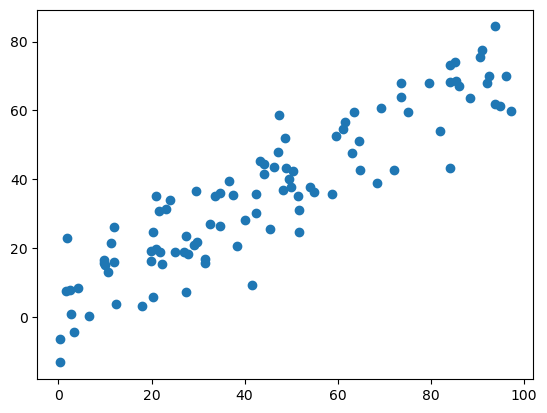

In [4]:
plt.scatter(X[:,0],X[:,1] )
plt.show()

## demean

In [5]:
def demean(X):
  return X- np.mean(X, axis=0)

In [6]:
X_demean = demean(X)

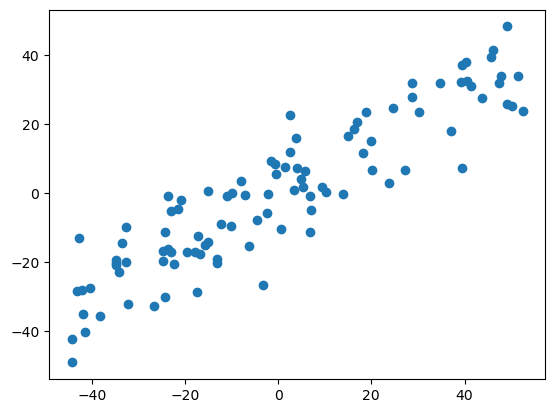

In [7]:
plt.scatter(X_demean[:,0],X_demean[:,1] )
plt.show()

# 梯度上升法

In [8]:
def f(w, X):
  return  np.sum((X.dot(w))**2) / len(X)

In [9]:
def df_math(w, X):
  return X.T.dot(X.dot(w)) * 2. / len(X)

In [10]:
def df_debug(w, X, epsilon = 0.0001):
  res = np.empty(len(w))
  for i in range(len(w)):
    w_1 = w.copy()
    w_1[i] += epsilon
    w_2 = w.copy()
    w_2[i] -= epsilon
    res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
  return res

In [11]:
### 方向向量
def direction(w):
  return w / np.linalg.norm(w)

In [12]:
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
  cur_iter = 0
  w = direction(initial_w)
  while cur_iter < n_iters:
    gradient = df(w, X)
    last_w = w
    w = w + eta * gradient
    w = direction(w) # 注意1：每次求一个单位方向
    if abs(f(w,X) - f(last_w, X)) < epsilon:
      break
    
    cur_iter += 1
  
  return w

In [13]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w

array([0.99625843, 0.79146501])

In [14]:
eta = 0.01

In [15]:
# 注意3：不能使用StandardScaler标准化数据


In [16]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.79399727, 0.60792133])

In [17]:
w =gradient_ascent(df_math, X_demean, initial_w, eta)

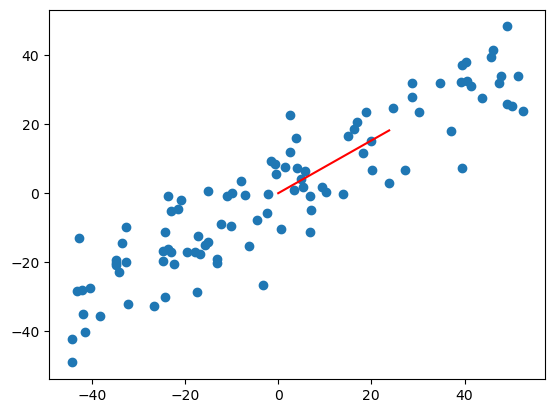

In [18]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')

In [19]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

In [22]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size = 100)
X2[:,1] = 0.75 * X2[:,0] + 3. 

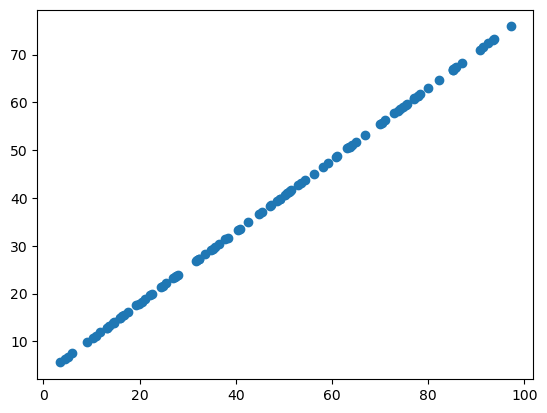

In [23]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [25]:
X2_demean = demean(X2)

w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
